# Country Cutout Open Data Example

This example shows the users how to use earthkit-geo (https://earthkit-geo.readthedocs.io) to retrieve a country cutout using Polytope.

In [ ]:
import earthkit
import earthkit.plots
import earthkit.geo.cartography

countries = ["France", "Italy", "Spain"] # List of countries

shapes = earthkit.geo.cartography.country_polygons(countries, resolution=50e6)

request = {     
    "class": "ai",
    "stream" : "oper",
    "type" : "fc",
    "date" : "20250224",
    "time" : "0000",
    "levtype" : "sfc",
    "expver" : "0102", 
    "model": "aifs-single",
    "domain" : "g",
    "param" : "166/167/169",
    "step" : "0",
    "feature": {
        "type": "polygon",
        "shape": shapes,
    },
}

ds = earthkit.data.from_source("polytope", "ecmwf-mars", request, stream=False, address='polytope-test.ecmwf.int')

The collection being accessed is `ecmwf-mars`. The endpoint being accessed is `polytope.ecmwf.int`. Earthkit-geo is used to return the shape of the requested countries.

A user can also convert the data to xarray in the following way:

In [2]:
xa = ds.to_xarray()
xa

<xarray.Dataset> Size: 81kB
Dimensions:    (datetimes: 1, number: 1, steps: 1, points: 1444)
Coordinates:
  * datetimes  (datetimes) <U20 80B '2025-02-24T00:00:00Z'
  * number     (number) int64 8B 0
  * steps      (steps) int64 8B 0
  * points     (points) int64 12kB 0 1 2 3 4 5 ... 1438 1439 1440 1441 1442 1443
    x          (points) float64 12kB 27.68 27.96 28.24 ... 50.73 51.01 51.01
    y          (points) float64 12kB 342.0 344.4 343.4 345.9 ... 2.917 2.083 2.5
    z          (points) float64 12kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Data variables:
    10v        (datetimes, number, steps, points) float64 12kB -3.243 ... 7.162
    2t         (datetimes, number, steps, points) float64 12kB 289.4 ... 284.5
    ssrd       (datetimes, number, steps, points) float64 12kB 0.0 0.0 ... 0.0
Attributes:
    class:          ai
    Forecast date:  2025-02-24T00:00:00Z
    domain:         g
    expver:         0102
    levtype:        sfc
    model:          aifs-single
    step:           0
    stream:         oper
    type:           fc
    number:         0
    date:           2025-02-24T00:00:00Z

## Visualise

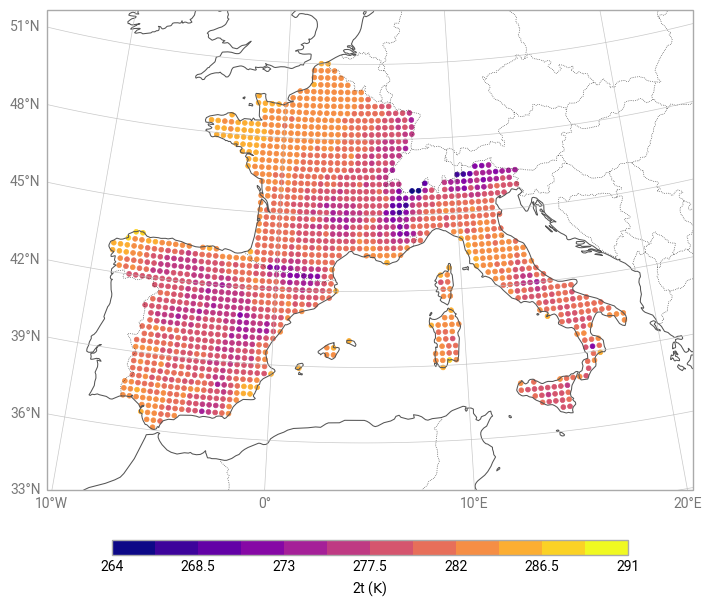

In [3]:
chart = earthkit.plots.Map(domain=countries)
chart.point_cloud(xa['2t'], x="y", y="x")
chart.coastlines()
chart.borders()
chart.gridlines()
chart.legend()
chart.show()